<a href="https://colab.research.google.com/github/Teelakreiste/PhraseGeneticAlgorithm/blob/master/PhraseGeneticAlgorithm_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo Genético - Evolución de Frases - Documentación

Este documento proporciona una explicación y documentación para el código del algoritmo genético utilizado para resolver una frase objetivo.

Este código implementa un Algoritmo Genético para evolucionar una población de individuos y lograr que coincidan con una frase objetivo. El algoritmo imita el proceso de selección natural y herencia genética para encontrar la mejor solución.

## Descripción del Problema

El objetivo del algoritmo es generar una frase objetivo dada, utilizando un enfoque de algoritmo genético. Se parte de una población inicial de individuos con genes aleatorios y, a través de selección, reproducción y mutación, se busca mejorar la aptitud de la población a lo largo de las generaciones hasta encontrar la frase objetivo.

## Descripción general del algoritmo

1. **Inicialización**: Se crea una población inicial de individuos con genes aleatorios.
2. **Cálculo de Aptitud**: Se calcula la aptitud de cada individuo comparando sus genes con la frase objetivo.
3. **Selección**: Se seleccionan los individuos para la reproducción basándose en su aptitud, utilizando un método de selección ponderado por probabilidad.
4. **Cruce**: Se crean descendientes realizando cruces entre pares de padres seleccionados, combinando sus genes para crear nuevos individuos.
5. **Mutación**: Se introducen cambios aleatorios (mutaciones) en los genes de los descendientes para mantener diversidad en la población.
6. **Evaluación de Aptitud**: Se calcula la aptitud de los nuevos individuos.
7. **Reemplazo**: Se reemplaza la antigua generación con la nueva generación de descendientes.
8. **Terminación**: Se repiten los pasos 3-7 hasta que se encuentre la frase objetivo o se cumpla una condición de terminación.
9. **Resultados**: Se muestra la mejor frase encontrada y el número de generaciones necesarias para alcanzarla.

## Clases

### `DNA`

Representa un individuo en la población.

#### Propiedades

- `target`: La frase objetivo a coincidir.
- `genes`: Los genes (caracteres) del individuo.
- `fitness`: El valor de aptitud del individuo.

#### Métodos

- `calculate_fitness()`: Calcula la aptitud del individuo basándose en el número de genes coincidentes con la frase objetivo.
- `crossover(partner)`: Realiza un cruce con otro individuo para crear un hijo con una combinación de genes de ambos padres.
- `mutate(mutation_rate)`: Realiza mutaciones aleatorias en los genes del individuo con una tasa de mutación dada.
- `get_phrase()`: Devuelve la representación en forma de cadena de los genes del individuo.

### `Population`

Representa una población de individuos.

#### Propiedades

- `target_phrase`: La frase objetivo a coincidir.
- `total_population`: El número total de individuos en la población.
- `mutation_rate`: La probabilidad de mutación para un individuo.
- `population`: Una lista de objetos `DNA` que representa la población.
- `generation`: El número de generación actual.
- `best_fitness`: La aptitud del mejor individuo.
- `best_phrase`: La mejor frase encontrada en la población.
- `average_fitness_history`: Una lista para almacenar la aptitud promedio a lo largo de las generaciones.
- `best_fitness_history`: Una lista para almacenar la mejor aptitud a lo largo de las generaciones.

#### Métodos

- `calculate_fitness()`: Calcula la aptitud de cada individuo en la población.
- `selection()`: Selecciona los individuos para la reproducción basándose en su aptitud.
- `reproduction(mating_pool)`: Realiza la reproducción y genera una nueva población a partir de una "piscina de apareamiento".
- `evolve()`: Ejecuta el proceso de evolución de la población hasta que se alcance la frase objetivo.
- `display_progress()`: Muestra información sobre la generación actual y el progreso de la evolución.
- `plot_fitness_progress()`: Muestra un gráfico del progreso del mejor fitness a lo largo de las generaciones.
- `calculate_average_fitness()`: Calcula la aptitud promedio de la población en la generación actual.
- `plot_average_fitness()`: Muestra un gráfico del progreso del aptitud promedio a lo largo de las generaciones.

## Uso

1. Definir los parámetros del algoritmo genético, como la frase objetivo, la tasa de mutación y el tamaño de la población.
2. Crear una instancia de la clase `Population`, pasando los parámetros definidos.
3. Llamar al método `evolve()` en la instancia de `Population` para comenzar la evolución.
4. El algoritmo se ejecutará hasta que se alcance la frase objetivo, mostrando información detallada sobre el progreso en cada generación.
5. Una vez finalizado el algoritmo, se imprimirá un mensaje indicando que el algoritmo ha finalizado.
6. Se mostrará la mejor frase encontrada y el número total de generaciones transcurridas.

```python
# Parámetros para el Algoritmo Genético
target_phrase = "BACK TO THE FUTURE"
mutation_rate = 0.01
total_population = 150

# Crear una instancia de la población y evolucionar
population = Population(target_phrase, total_population, mutation_rate)
population.evolve()

print("¡Algoritmo finalizado!")
print("Mejor frase encontrada:", population.best_phrase)
print("Generaciones totales:", population.generation)

# Mostrar el gráfico del progreso del mejor fitness y aptitud promedio
population.plot_fitness_progress()
population.plot_average_fitness()
```

¡Eso es todo! Ahora estás listo para utilizar el código del algoritmo genético para resolver una frase objetivo. ¡Diviértete y experimenta con diferentes frases y parámetros para obtener resultados interesantes! Si tienes alguna pregunta adicional, no dudes en consultar la documentación o realizar preguntas adicionales. ¡Buena suerte!

**Nota**: el código fue basado y adaptado de [Nature of Code](https://natureofcode.com/book/chapter-9-the-evolution-of-code/).

In [6]:
# Librerias
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
class DNA:
    def __init__(self, target):
        self.target = target
        self.genes = [chr(random.randint(32, 127)) for _ in range(len(target))] # Genera genes aleatorios
        self.fitness = 0.0
        self.fitness = 0.0

    def calculate_fitness(self):
        score = sum(1 for gene, target_gene in zip(self.genes, self.target) if gene == target_gene)
        self.fitness = score / len(self.target) # Calcula la aptitud del individuo

    def crossover(self, partner):
        child = DNA(self.target)
        midpoint = random.randint(0, len(self.genes))
        child.genes = self.genes[:midpoint] + partner.genes[midpoint:] # Combina los genes de dos padres
        return child

    def mutate(self, mutation_rate):
        for i in range(len(self.genes)):
            if random.random() < mutation_rate:
                self.genes[i] = chr(random.randint(32, 127)) # Realiza mutaciones en los genes con cierta probabilidad

    def get_phrase(self):
        return ''.join(self.genes) # Devuelve la representación de los genes como una cadena


In [69]:
class Population:
    def __init__(self, target_phrase, total_population, mutation_rate):
        self.target_phrase = target_phrase
        self.total_population = total_population
        self.mutation_rate = mutation_rate
        self.population = [DNA(target_phrase) for _ in range(total_population)] # Crea la población inicial
        self.generation = 0
        self.best_fitness = 0.0
        self.best_phrase = ""
        self.average_fitness_history = []
        self.best_fitness_history = []
        self.diversity_history = []
        self.convergence_history = []
        self.mutation_rate_history = []

    def calculate_fitness(self):
        for individual in self.population:
            individual.calculate_fitness() # Calcula la aptitud de cada individuo en la población

    def selection(self):
        mating_pool = []
        for individual in self.population:
            n = int(individual.fitness * 100)
            mating_pool.extend([individual] * n) # Crea una "piscina de apareamiento" ponderada por la aptitud
        return mating_pool

    def reproduction(self, mating_pool):
        new_population = []
        for _ in range(self.total_population):
            parent_a = random.choice(mating_pool)
            parent_b = random.choice(mating_pool)
            child = parent_a.crossover(parent_b) # Realiza cruces entre los individuos seleccionados
            child.mutate(self.mutation_rate) # Aplica mutaciones al hijo
            child.calculate_fitness() # Calcula la aptitud del hijo
            new_population.append(child) # Agrega el hijo a la nueva población
        self.population = new_population

    def evolve(self):
        while True:
            self.calculate_fitness()
            mating_pool = self.selection()
            self.reproduction(mating_pool)
            best_individual = max(self.population, key=lambda x: x.fitness)
            self.best_fitness = best_individual.fitness
            self.best_phrase = best_individual.get_phrase()
            self.generation += 1

            self.display_progress()

            self.average_fitness_history.append(self.calculate_average_fitness())
            self.best_fitness_history.append(self.best_fitness)
            self.diversity_history.append(self.calculate_genetic_diversity())
            self.convergence_history.append(self.calculate_convergence())
            self.mutation_rate_history.append(self.mutation_rate)

            if self.best_phrase == self.target_phrase:
              break

    def display_progress(self):
        print("Generation:", self.generation)
        print("Best phrase:", self.best_phrase)
        print("Best fitness:", self.best_fitness)
        average_fitness = sum(individual.fitness for individual in self.population) / self.total_population
        print("Average fitness:", average_fitness)
        print("---------------------------")

    def plot_fitness_progress(self):
        generations = list(range(self.generation))
        fitness_values = self.best_fitness_history[:self.generation]
        plt.title("Progress of Best Fitness")
        plt.plot(generations, fitness_values)
        plt.title("Progress of Best Fitness")
        plt.xlabel("Generation")
        plt.ylabel("Best Fitness")
        plt.show()

    def calculate_average_fitness(self):
        return sum(individual.fitness for individual in self.population) / self.total_population

    def calculate_genetic_diversity(self):
        genes = np.array([individual.genes for individual in self.population])
        return len(np.unique(genes))

    def calculate_convergence(self):
        return self.best_fitness - np.max(self.best_fitness_history)

    def plot_average_fitness(self):
        generations = list(range(self.generation))
        average_fitness_values = self.average_fitness_history[:self.generation]
        plt.title("Progress of Average Fitness")
        plt.plot(generations, average_fitness_values)
        plt.title("Progress of Average Fitness")
        plt.xlabel("Generation")
        plt.ylabel("Average Fitness")
        plt.show()


    def plot_genetic_diversity(self):
        generations = np.arange(self.generation)
        diversity_values = self.diversity_history
        plt.plot(generations, diversity_values)
        plt.title("Genetic Diversity")
        plt.xlabel("Generation")
        plt.ylabel("Diversity")
        plt.show()

    def plot_convergence(self):
        generations = np.arange(self.generation)
        convergence_values = self.convergence_history
        plt.plot(generations, convergence_values)
        plt.title("Convergence")
        plt.xlabel("Generation")
        plt.ylabel("Convergence")
        plt.show()

    def plot_mutation_rate(self):
        generations = np.arange(self.generation)
        mutation_rate_values = self.mutation_rate_history
        plt.plot(generations, mutation_rate_values)
        plt.title("Mutation Rate")
        plt.xlabel("Generation")
        plt.ylabel("Mutation Rate")
        plt.show()

In [83]:
# Parámetros del algoritmo genético
#@markdown Parámetros del algoritmo genético
target_phrase = "BACK TO FUTURE" #@param {type:"string"}
mutation_rate = 0.01 #@param {type:"number"}
total_population = 150 #@param {type:"number"}


In [84]:
# Crear una instancia de la población y evolucionar
population = Population(target_phrase, total_population, mutation_rate)
try:
  population.evolve()
except KeyboardInterrupt:
  print("\n\nStopped execution abruptly\n\n")

print("Algorithm finished!")
print("Best phrase:", population.best_phrase)
print("Total generations:", population.generation)

Generation: 1
Best phrase: B`6#$T#b7p{S:n
Best fitness: 0.14285714285714285
Average fitness: 0.07380952380952373
---------------------------
Generation: 2
Best phrase: B|KDcT#3Flqf[^
Best fitness: 0.21428571428571427
Average fitness: 0.09857142857142845
---------------------------
Generation: 3
Best phrase: 4+CjDfBvi}TX_E
Best fitness: 0.21428571428571427
Average fitness: 0.11952380952380946
---------------------------
Generation: 4
Best phrase: `A4!cT/N|oF}RE
Best fitness: 0.2857142857142857
Average fitness: 0.14523809523809514
---------------------------
Generation: 5
Best phrase: B2(!cT/NJST-TE
Best fitness: 0.2857142857142857
Average fitness: 0.1676190476190477
---------------------------
Generation: 6
Best phrase: TA4#$T#B/UW}RE
Best fitness: 0.35714285714285715
Average fitness: 0.1823809523809524
---------------------------
Generation: 7
Best phrase: `A4#$T#B/UWLRE
Best fitness: 0.35714285714285715
Average fitness: 0.20523809523809522
---------------------------
Generation: 8
Bes

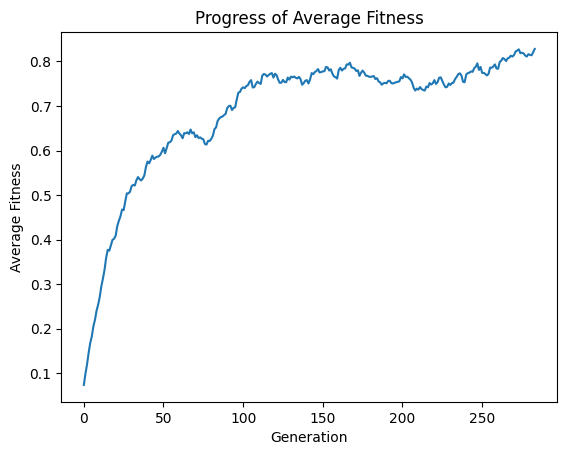

In [85]:
# Gráfico del progreso del promedio de aptitud
population.plot_average_fitness()

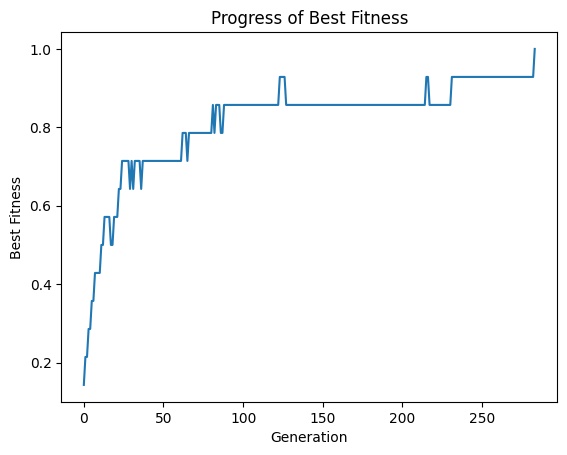

In [86]:
# Gráfico del progreso de la mejor aptitud
population.plot_fitness_progress()

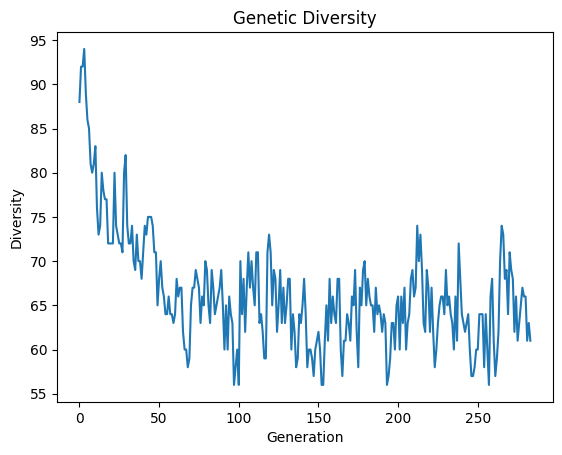

In [87]:
# Gráfico de la diversidad genética
population.plot_genetic_diversity()

La diversidad genética se refiere a la variedad de combinaciones de caracteres y palabras que pueden generarse a partir de un conjunto de genes (en este caso, los genes representan los caracteres y palabras individuales). Cuanta mayor diversidad genética exista, más posibilidades habrá de generar diferentes frases.

En un algoritmo genético aplicado a la generación de frases, la diversidad genética es esencial para encontrar la solución óptima y evitar la convergencia prematura. Si la diversidad genética es baja, es decir, las frases generadas son muy similares entre sí, puede ser difícil encontrar una frase que se acerque a la solución deseada. En cambio, si existe una alta diversidad genética, habrá más opciones y variedad en las frases generadas, lo que aumenta las posibilidades de encontrar la frase objetivo.

La diversidad genética se mide en términos de la cantidad de variación y diferencias que existen en las frases generadas. Si la diversidad genética se mantiene constante, significa que las frases generadas no están experimentando cambios significativos y están estancadas en un estado particular. Esto puede indicar que el algoritmo genético ha alcanzado un mínimo local o que está atrapado en una región del espacio de búsqueda donde las frases no pueden mejorar su adaptación.

Por lo tanto, es deseable mantener una diversidad genética adecuada durante el proceso de evolución de las frases. Esto se puede lograr mediante técnicas como el ajuste del tamaño de la población, la manipulación de la tasa de mutación y la introducción de mecanismos de recombinación genética. Estas estrategias ayudan a mantener una exploración amplia del espacio de búsqueda y evitan que el algoritmo genético se quede estancado en soluciones subóptimas.

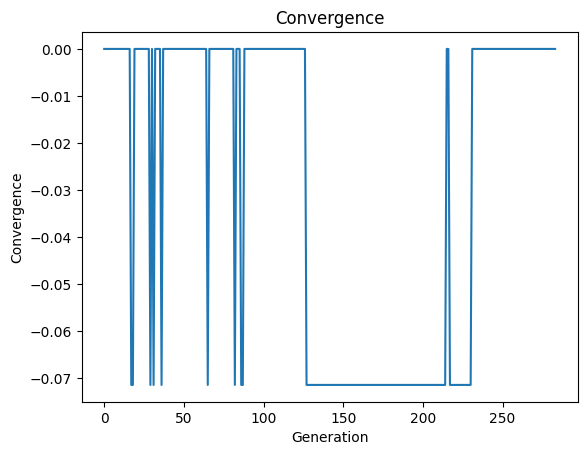

In [88]:
# Gráfico de convergencia
population.plot_convergence()

El gráfico de convergencia muestra la evolución de la diferencia entre el mejor fitness de la generación actual y el mejor fitness alcanzado hasta ese punto durante la ejecución de un algoritmo genético para generar frases. Este gráfico es especialmente útil para evaluar la convergencia del algoritmo y determinar si se está acercando a la solución óptima o si está estancado en un mínimo local.

Al interpretar el gráfico de convergencia, se deben tener en cuenta los siguientes aspectos:

**Tendencia descendente:** En general, se espera que la diferencia entre el mejor fitness de la generación actual y el mejor fitness histórico disminuya a medida que el algoritmo evoluciona. Esto indica que el algoritmo está mejorando progresivamente y acercándose a la solución óptima.

**Estancamiento:** Si la diferencia se mantiene constante o fluctúa en un rango estrecho durante varias generaciones, puede indicar que el algoritmo ha alcanzado un mínimo local y tiene dificultades para mejorar. En este caso, es posible que sea necesario ajustar los parámetros del algoritmo, como la tasa de mutación o la estrategia de selección, para superar el estancamiento y explorar nuevas soluciones.

**Cambios bruscos:** Pueden producirse cambios bruscos en la diferencia entre el mejor fitness actual y el mejor fitness histórico debido a la selección de individuos altamente aptos o la introducción de mutaciones que generan mejoras significativas. Estos cambios pueden indicar momentos clave en los que el algoritmo descubre soluciones más prometedoras.

En resumen, al interpretar el gráfico de convergencia, se busca identificar patrones que indiquen una mejora progresiva, estancamiento o cambios bruscos en el rendimiento del algoritmo. Esto permite ajustar los parámetros y estrategias de búsqueda para lograr una convergencia exitosa hacia la solución óptima.

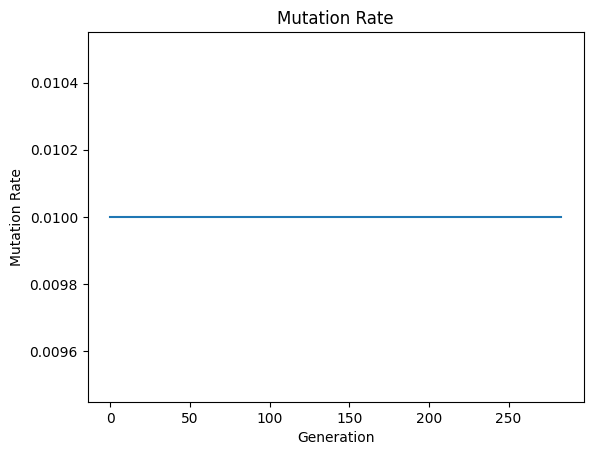

In [89]:
# Gráfico de la tasa de mutación
population.plot_mutation_rate()

# Conclusiones
- El Algoritmo Genético es una poderosa técnica de optimización que puede utilizarse para resolver una amplia variedad de problemas. En este código, se aplicó para evolucionar una población y lograr que coincida con una frase objetivo. Mediante la selección de los individuos más aptos, el cruce y la mutación, el algoritmo converge gradualmente hacia la frase deseada.

- **La evolución genética puede utilizarse para generar texto similar a una frase objetivo**: El código implementa un algoritmo genético que busca generar una frase objetivo mediante la evolución de una población de individuos con genes aleatorios. A través de la reproducción, mutación y selección, los individuos de la población van evolucionando hacia una mejor adaptación a la frase objetivo. Esta capacidad de evolución genética puede aplicarse a otros problemas de generación de texto o codificación.

- **El éxito del algoritmo depende de la función de aptitud y los parámetros de evolución**: En el código adaptado, la función de aptitud se calcula como la relación de caracteres correctos en comparación con la frase objetivo. Sin embargo, la eficacia del algoritmo puede depender de cómo se define y calcula la función de aptitud, así como de los parámetros de evolución, como la tasa de mutación y el tamaño de la población. Ajustar adecuadamente estos parámetros puede ser crucial para obtener mejores resultados.

- **La evolución genética puede requerir múltiples generaciones para converger**: El código muestra que la evolución genética puede requerir un número significativo de generaciones para acercarse a la frase objetivo. En cada generación, los individuos de la población se reproducen y mutan, pero puede llevar tiempo encontrar la combinación adecuada de genes que coincidan con la frase objetivo. Es importante tener en cuenta que la convergencia puede variar según la complejidad de la frase objetivo y los parámetros del algoritmo.